In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install tqdm
from tqdm import tqdm

     ---------------------------------------- 0.0/77.1 kB ? eta -:--:--
     ---------------------------------------- 77.1/77.1 kB ? eta 0:00:00


In [2]:
train = pd.read_csv('train.csv')
train.head()

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True


In [3]:
train.describe()

,site_id,patient_id,image_id,age,cancer,biopsy,invasive,BIRADS,implant,machine_id
count,54706.000000,54706.000000,5.470600e+04,54669.000000,54706.000000,54706.000000,54706.000000,26286.000000,54706.000000,54706.000000
mean,1.460407,32698.865262,1.079386e+09,58.543928,0.021168,0.054272,0.014953,0.772350,0.026999,54.618378
std,0.498434,18893.861534,6.183269e+08,10.050884,0.143944,0.226556,0.121365,0.590062,0.162081,44.784800
min,1.000000,5.000000,6.849100e+04,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
25%,1.000000,16481.000000,5.458153e+08,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000
50%,1.000000,32432.000000,1.082689e+09,59.000000,0.000000,0.000000,0.000000,1.000000,0.000000,49.000000
75%,2.000000,48999.000000,1.613228e+09,66.000000,0.000000,0.000000,0.000000,1.000000,0.000000,49.000000
max,2.000000,65534.000000,2.147472e+09,89.000000,1.000000,1.000000,1.000000,2.000000,1.000000,216.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54706 entries, 0 to 54705
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   site_id                  54706 non-null  int64  
 1   patient_id               54706 non-null  int64  
 2   image_id                 54706 non-null  int64  
 3   laterality               54706 non-null  object 
 4   view                     54706 non-null  object 
 5   age                      54669 non-null  float64
 6   cancer                   54706 non-null  int64  
 7   biopsy                   54706 non-null  int64  
 8   invasive                 54706 non-null  int64  
 9   BIRADS                   26286 non-null  float64
 10  implant                  54706 non-null  int64  
 11  density                  29470 non-null  object 
 12  machine_id               54706 non-null  int64  
 13  difficult_negative_case  54706 non-null  bool   
dtypes: bool(1), float64(2)

In [11]:
base_path = 'train_images/'

train['image_path'] = np.nan

for row in tqdm(range(len(train))):
    train['image_path'].iloc[row] = base_path + str(train['patient_id'].iloc[row]) + '/' + str(train['image_id'].iloc[row]) + '.dcm'

train.head()

  0%|          | 0/54706 [00:00<?, ?it/s]C:\Users\marcj\AppData\Local\Temp\ipykernel_20748\34865087.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['image_path'].iloc[row] = base_path + str(train['patient_id'].iloc[row]) + '/' + str(train['image_id'].iloc[row]) + '.dcm'
100%|██████████| 54706/54706 [00:05<00:00, 10584.91it/s]


,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,image_path
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False,train_images/10006/462822612.dcm
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False,train_images/10006/1459541791.dcm
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False,train_images/10006/1864590858.dcm
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False,train_images/10006/1874946579.dcm
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True,train_images/10011/220375232.dcm


The average age in a negative case is: 58.43280820765824 .
The average age in a positive case is: 63.67875647668394 .

The standard deviation in a negative case is: 10.023209994270715 .
The standard deviation in a positive case is: 9.99198025044388 .



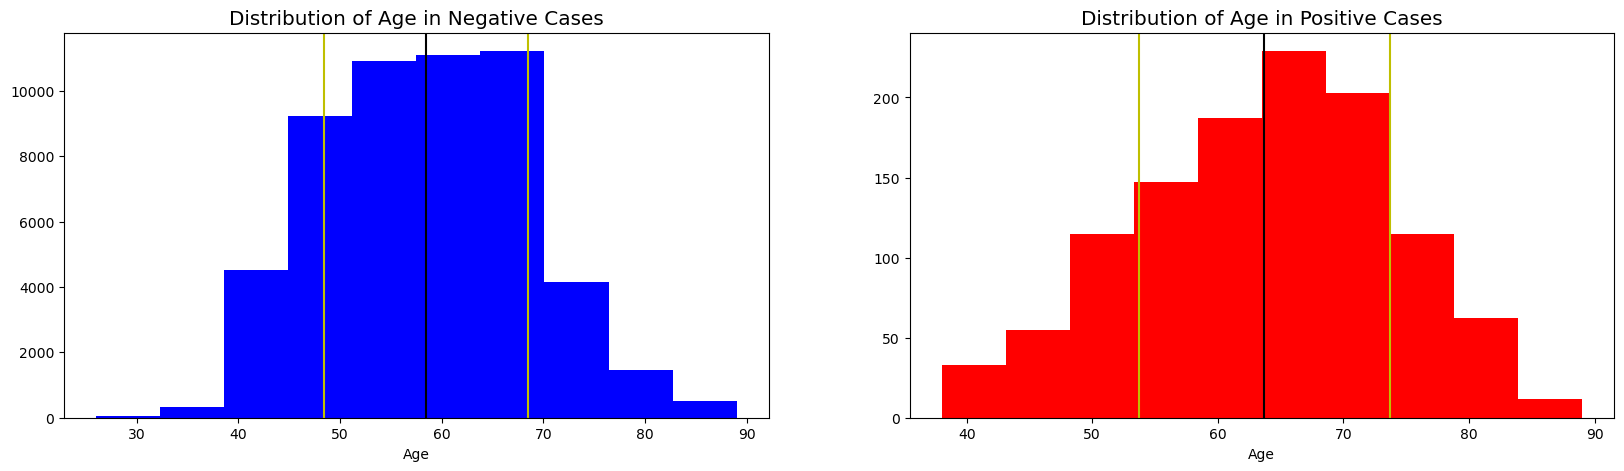

In [12]:
fig, ax = plt.subplots(1, 2, figsize = (20,5))
plt.style.use('ggplot')

ax[0].set_title('Distribution of Age in Negative Cases')
ax[0].set_xlabel('Age')
ax[0].hist(train[train['cancer'] == 0]['age'], color = 'blue')
ax[0].axvline(x = train[train['cancer'] == 0]['age'].mean(), color = 'black', label = 'Average')
ax[0].axvline(x = train[train['cancer'] == 0]['age'].mean() + train[train['cancer'] == 0]['age'].std(), color = 'y', label = 'Upper STD')
ax[0].axvline(x = train[train['cancer'] == 0]['age'].mean() - train[train['cancer'] == 0]['age'].std(), color = 'y', label = 'Lower STD')

ax[1].set_title('Distribution of Age in Positive Cases')
ax[1].set_xlabel('Age')
ax[1].hist(train[train['cancer'] == 1]['age'], color = 'red')
ax[1].axvline(x = train[train['cancer'] == 1]['age'].mean(), color = 'black', label = 'Average')
ax[1].axvline(x = train[train['cancer'] == 1]['age'].mean() + train[train['cancer'] == 1]['age'].std(), color = 'y', label = 'Upper STD')
ax[1].axvline(x = train[train['cancer'] == 1]['age'].mean() - train[train['cancer'] == 1]['age'].std(), color = 'y', label = 'Lower STD')

print('The average age in a negative case is:', train[train['cancer'] == 0]['age'].mean(), '.')
print('The average age in a positive case is:', train[train['cancer'] == 1]['age'].mean(), '.')
print()
print('The standard deviation in a negative case is:', train[train['cancer'] == 0]['age'].std(), '.')
print('The standard deviation in a positive case is:', train[train['cancer'] == 1]['age'].std(), '.')
print()

The number of negative cases is: 11907 .
The number of positive cases is: 486 .



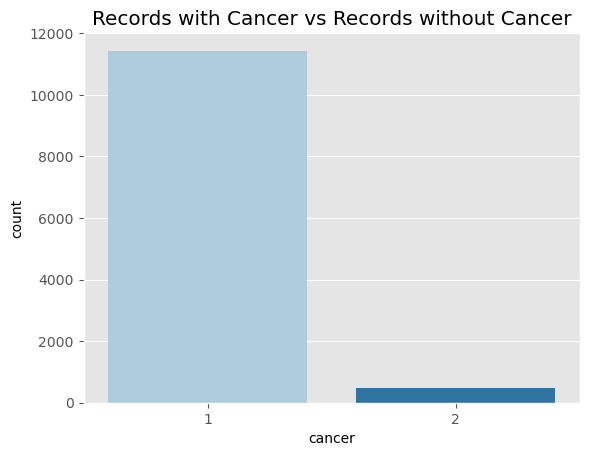

In [13]:
fig, ax = plt.subplots()
sns.countplot(x = 'cancer', data = train.groupby('patient_id').nunique(), palette = 'Paired')
ax.set_title('Records with Cancer vs Records without Cancer')

print('The number of negative cases is:', len(train[train['cancer'] == 0].groupby('patient_id').nunique()), '.')
print('The number of positive cases is:', len(train[train['cancer'] == 1].groupby('patient_id').nunique()), '.')
print()

In [ ]:
train.to_pickle('train_metadata.pkl')